# Lennard-Jones potential and force

This quick notebook lets you visualize the Lennard-Jones potential and force. The Lennard-Jones potential is a simple model for the interaction between two atoms or molecules. It is also often called the "12-6 potential" due to the powers of its two terms - the first term is a repulsive term that goes as $r^{-12}$, and the second term is an attractive term that goes as $r^{-6}$. The potential is given by:

$$
U(r) = 4 \epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right]
$$

## What are those Greek letters? 🇬🇷

From our previous considerations, we know that $r$ is simply the distance between two particles, but what about $\epsilon$ and $\sigma$? These are the parameters of the Lennard-Jones potential, that are two little knobs with which we can control the characteristics of interactions between our atoms. In other words, they are quantities dependent on the physical/chemical makeup of our system - just like the material was for our spring!

To find their influence upon the Lennard-Jones (LJ) potential, let's implement it as a Python function that takes three arguments: distance $r$, and the two parameters $\epsilon$ and $\sigma$.

In [9]:
def lennard_jones_potential(distance: float, sigma: float, epsilon: float):
    return 4 * epsilon * ((sigma / distance) ** 12 - (sigma / distance) ** 6)

Next, we can use any plotting library available in Python to graph this function and see how it behaves for different values of $\epsilon$ and $\sigma$. We will use the `matplotlib` library for this purpose.

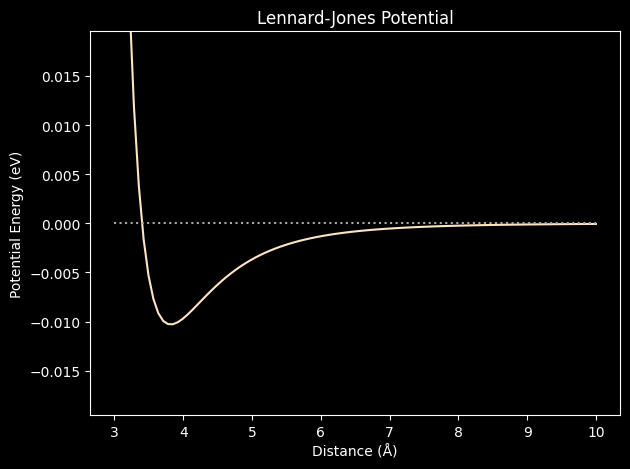

In [10]:
import matplotlib.pyplot as plt
import numpy

MINIMUM_DISTANCE = 3
MAXIMUM_DISTANCE = 10

LJ_SIGMA = 3.4
LJ_EPSILON = 0.0103

distances = numpy.linspace(MINIMUM_DISTANCE, MAXIMUM_DISTANCE, 100)
derivative_values = [
    lennard_jones_potential(distance, LJ_SIGMA, LJ_EPSILON)
    for distance in distances
]

plt.plot(distances, derivative_values, color='bisque')

plt.xlabel('Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Lennard-Jones Potential')

plt.ylim(
    -0.2*lennard_jones_potential(MINIMUM_DISTANCE, LJ_SIGMA, LJ_EPSILON),
    0.2*lennard_jones_potential(MINIMUM_DISTANCE, LJ_SIGMA, LJ_EPSILON),
)

plt.grid(False)
plt.style.use('dark_background')
plt.tight_layout()
plt.hlines(0, MINIMUM_DISTANCE, MAXIMUM_DISTANCE, color='darkgray', linestyles='dotted')

plt.show()

Here we can see that this curve has one, special place in its first half on the left - the so-called "potential valley", which has its minimum somewhere before the distance of $r = 4 \AA$, with the depth strangely similar to the value of `LJ_EPSILON` parameter, seen in the Python code above.

This calls for an investigation and luckily, Jupyter Notebooks have a couple of tricks up their sleeve, which will allows us to study this function interactively.
To get started, we will use the `ipywidgets` library to create sliders for $\epsilon$ and $\sigma$ and see how the potential changes as we move them around.

In [11]:
import micropip

await micropip.install("ipywidgets")
import ipywidgets

def plot_lennard_jones(sigma: float, epsilon: float, distances_range: tuple[float, float]):
    '''
        Plot the Lennard-Jones potential for a given sigma, epsilon, and range of distances.
        This function is basically a copy-paste of the previous code, but with the parameters
        replaced by the ones passed to the function.
    '''
    distances = numpy.linspace(*distances_range, 100)
    potentials = [
        lennard_jones_potential(distance, sigma, epsilon)
        for distance in distances
    ]

    plt.plot(distances, potentials, color='bisque')

    plt.xlabel('Distance (Å)')
    plt.ylabel('Potential Energy (eV)')
    plt.title('Lennard-Jones Potential')

    plt.ylim(-0.2, 0.2)
    plt.xlim(*distances_range)

    plt.grid(False)
    plt.style.use('dark_background')
    plt.tight_layout()
    plt.hlines(0, *distances_range, color='darkgray', linestyles='dotted')

    plt.show()

ipywidgets.interact(
    plot_lennard_jones,
    sigma=(0.1, 10, 0.01),
    epsilon=(0.001, 0.1, 0.001),
    distances_range=ipywidgets.FloatRangeSlider(
        min=1, max=20, step=0.1, value=[3, 10],
        description='Distances (Å)',
    ),
)
print("")

interactive(children=(FloatSlider(value=5.05, description='sigma', max=10.0, min=0.1, step=0.01), FloatSlider(…

If You play around with the sliders, You will start to see a very interesting pattern - the depth of the potential well is directly proportional to the value of $\epsilon$, and the position of the minimum is directly proportional to the value of $\sigma$. But why? Well, in mathematics, if You want to gain some additional insight into the maximum or minimum of the function, You can try calculating its first **derivative** and figure out where it is equal to zero. This is exactly what we will do next - but in a dope way, using the `sympy` library to calculate the derivative symbolically and plot it using `matplotlib`.

## Snake mathemagics 🐍🎩

So, `sympy` is a very cool library, that can be used to automagically derive expressions and solve problems based on input functions expressed purely with symbols. This is a very powerful tool, and we will use it to calculate the first derivative of the Lennard-Jones potential and plot it to see where it is equal to zero.

In [12]:
import sympy

r = sympy.symbols('r')
sigma, epsilon = sympy.symbols('sigma epsilon', positive=True, real=True)

lennard_jones_potential_expression = 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

print("Lennard-Jones potential:")
lennard_jones_potential_expression

Lennard-Jones potential:


4*epsilon*(-sigma**6/r**6 + sigma**12/r**12)

In [13]:
lennard_jones_potential_first_derivative = lennard_jones_potential_expression.diff(r)
print("\nFirst derivative of the Lennard-Jones potential:")
lennard_jones_potential_first_derivative


First derivative of the Lennard-Jones potential:


4*epsilon*(6*sigma**6/r**7 - 12*sigma**12/r**13)

Now we will quickly translate this expression into a Python function and do a quick plot of this derivative using Matplotlib, again. We will also create the same set of sliders as for the original potential function and see how they influence the shape of this new graph. To hit the point home even more, we will overlay the original potential curve over the generated plot - this should be our last hint. However, we can also use the fact that if we change the sign of values of the first derivative
of the potential, we will obtain **the force** acting on each of the atoms.

In [17]:
def lennard_jones_derivative(distance: float, sigma: float, epsilon: float):
    return 4 * epsilon * (((6 * sigma ** 6) / (distance ** 7)) - ((12 * sigma ** 12) / (distance ** 13)))

def plot_lennard_jones_functions(sigma: float, epsilon: float, distances_range: tuple[float, float]):
    distances = numpy.linspace(*distances_range, 100)
    derivative_values = [
        # Minus comes from the fact that its an antagonistic force
        # with relation to the displacement
        -1.0 * lennard_jones_derivative(distance, sigma, epsilon) 
        for distance in distances
    ]
    potential_values = [
        lennard_jones_potential(distance, sigma, epsilon)
        for distance in distances
    ]

    plt.plot(distances, derivative_values, color='blue', label="Derivative")
    plt.plot(distances, potential_values, color='red', label="Potential")

    plt.xlabel('Distance')
    plt.ylabel('Potential / LJ Force')
    plt.title('Lennard-Jones potential first derivative')

    plt.ylim(-0.2, 0.2)
    plt.xlim(*distances_range)

    plt.legend(loc="upper right")
    plt.grid(False)
    plt.style.use('dark_background')
    plt.tight_layout()
    plt.hlines(0, *distances_range, color='darkgray', linestyles='dotted')

    plt.show()

ipywidgets.interact(
    plot_lennard_jones_functions,
    sigma=(0.1, 10, 0.01),
    epsilon=(0.001, 0.1, 0.001),
    distances_range=ipywidgets.FloatRangeSlider(
        min=1, max=20, step=0.1, value=[3, 10],
        description='Distances (Å)',
    ),
)
print("")

interactive(children=(FloatSlider(value=5.05, description='sigma', max=10.0, min=0.1, step=0.01), FloatSlider(…

Here's the answer to our little inquiry - the $sigma$ parameter is the distance at which the first derivative of the potential (the **blue** curve representing the **FORCE** of interactions) is equal to zero. At this point the **POTENTIAL** (red curve) will hit the bottom of the well, as observed in the beginning of our journey.

Let's go back to the non-Jupyter portion of the article... 🏃‍♂️